In [54]:
import pandas as pd

data_raw = pd.read_csv('../data/imdb_dataset.csv')

In [55]:
data_raw.shape

(50000, 2)

In [56]:
print("Primeras filas del dataset:")
print(data_raw.head())

Primeras filas del dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re # Para expresiones regulares

import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def normalize_review(review):
    
    # Sustitución de etiquetas html
    review = re.sub(r'<br\s*/*>', '', review)
    
    # Sustitución de 's
    review = re.sub(r"(\w+)'s", r"\1", review)
    
    # Sustitución de palabras entre comillas
    review = re.sub(r"\"([^\"]+)\"", '', review)
    
    # Sustitución de n't
    review = re.sub(r"n't", " not", review)
    
    review = review.lower()
    
    tokens = word_tokenize(review)
    
    tokens = [word for word in tokens if word not in string.punctuation]
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    normalized_review = ' '.join(tokens)
    
    return normalized_review

[nltk_data] Downloading package punkt to C:\Users\U S U A R I
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\U S U A R I
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\U S U A R I
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
data = data_raw.copy()

data['normalized_review'] = data_raw['review'].apply(normalize_review)

In [59]:
print("Primeras filas del DataFrame con reseñas normalizadas:")
print(data[['review', 'normalized_review']].head())

Primeras filas del DataFrame con reseñas normalizadas:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                   normalized_review  
0  one reviewer mentioned watching 1 oz episode '...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei visually stunning film watch mr....  


In [60]:
data.shape

(50000, 3)

In [61]:
data.to_csv('../data/data_normalized.csv', index=False)

In [62]:
import matplotlib.pyplot as plt

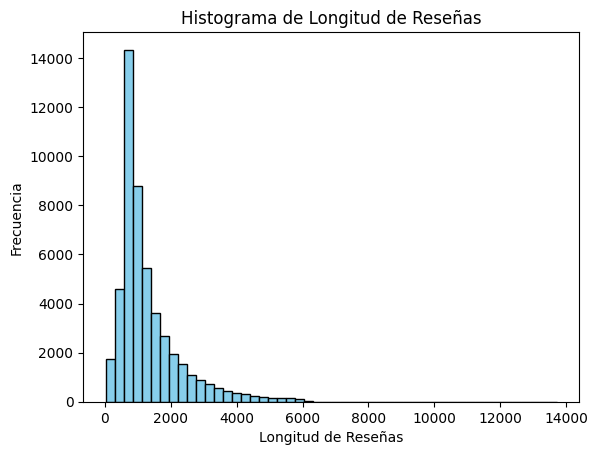

In [63]:
data['review_length'] = data['review'].apply(len)
plt.hist(data['review_length'], bins=50, color='skyblue', edgecolor='black')  
plt.title('Histograma de Longitud de Reseñas')
plt.xlabel('Longitud de Reseñas')
plt.ylabel('Frecuencia')
plt.show()

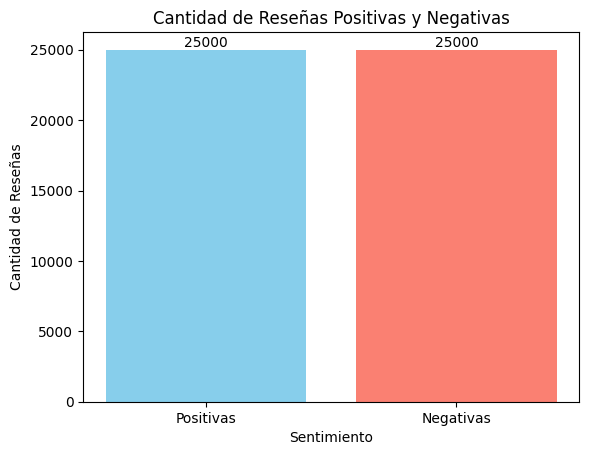

In [64]:
positive_reviews_count = data[data['sentiment'] == 'positive'].shape[0]
negative_reviews_count = data[data['sentiment'] == 'negative'].shape[0]

labels = ['Positivas', 'Negativas']
counts = [positive_reviews_count, negative_reviews_count]

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Cantidad de Reseñas Positivas y Negativas')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

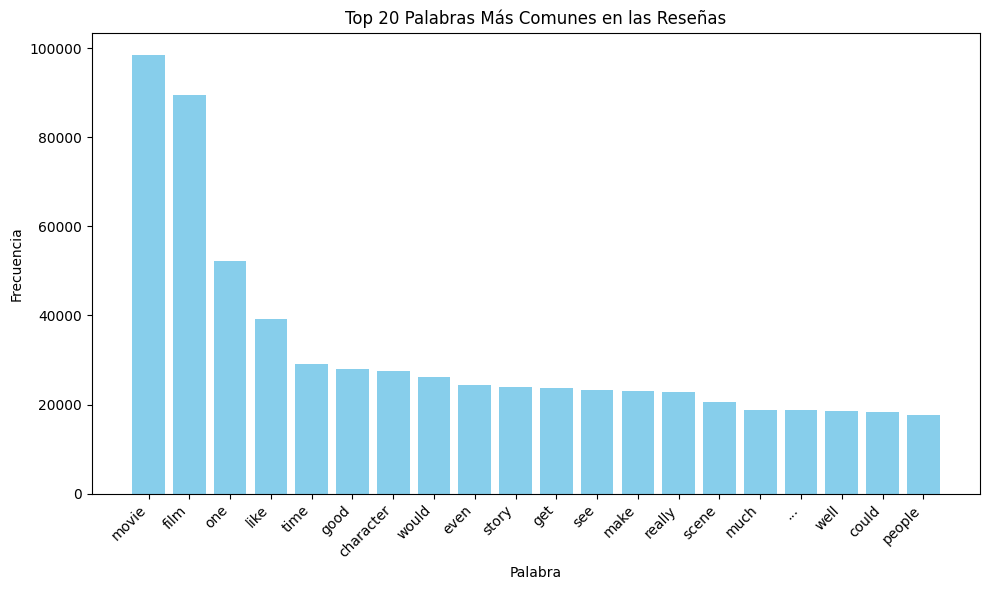

In [65]:
from collections import Counter

tokenized_reviews = ' '.join(data['normalized_review']).split()

word_freq = Counter(tokenized_reviews)

top_words = word_freq.most_common(20)

words, frequencies = zip(*top_words)

# Visualizar las palabras más comunes
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 20 Palabras Más Comunes en las Reseñas')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\U S U A R I O\AppData\Local\Temp\ipykernel_6648\31004959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=data, palette='Set2')


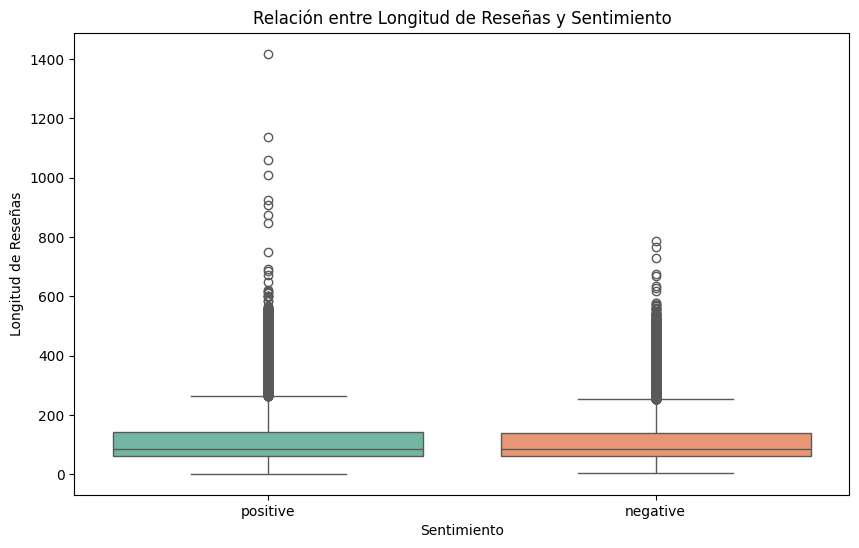

In [66]:
import seaborn as sns

data['review_length'] = data['normalized_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=data, palette='Set2')
plt.title('Relación entre Longitud de Reseñas y Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud de Reseñas')
plt.show()

In [67]:
# Filtrar reseñas positivas y encontrar la más larga
longest_positive_review = data[data['sentiment'] == 'positive']['normalized_review'].apply(lambda x: len(x)).idxmax()
longest_positive_review_text = data.loc[longest_positive_review, 'normalized_review']

# Filtrar reseñas negativas y encontrar la más larga
longest_negative_review = data[data['sentiment'] == 'negative']['normalized_review'].apply(lambda x: len(x)).idxmax()
longest_negative_review_text = data.loc[longest_negative_review, 'normalized_review']

print("Reseña positiva más larga:")
print(longest_positive_review_text)
print("\nReseña negativa más larga:")
print(longest_negative_review_text)


Reseña positiva más larga:
match 1 tag team table match bubba ray spike dudley v eddie guerrero chris benoit bubba ray spike dudley started thing tag team table match eddie guerrero chris benoit according rule match opponent go table order get win benoit guerrero heated early taking turn hammering first spike bubba ray german suplex benoit bubba took wind dudley brother spike tried help brother referee restrained benoit guerrero ganged corner benoit stomping away bubba guerrero set table outside spike dashed ring somersaulted top rope onto guerrero outside recovering taking care spike guerrero slipped table ring helped wolverine set tandem set double superplex middle rope would put bubba table spike knocked table right brother came crashing guerrero benoit propped another table corner tried irish whip spike bubba dashed blocked brother bubba caught fire lifted opponent back body drop bubba slammed guerrero spike stomped wolverine top rope bubba held benoit bay spike soar wassup headbut